In [1]:
using QuantumOptics
using PyPlot

In [2]:
ω_C = 2*π       #Cavity Frecuency
ω_A = 2*π       #Atom Frecuency
g = 2*π*0.05    #Coupling Strength
#g = 1
κ = 0.005        #Cavity Dissipation Rate
γ = 0.05        #Atom Dissipation Rate
N = 15          #Number of Cavity Fock States



########################


# Bases
# Definimos las bases en las que trabajaremos. Al final tomamos el producto tensorial para general la base general. 

b_fock = FockBasis(N)
b_spin = SpinBasis(1//2)
b = b_fock ⊗ b_spin


########################

# Fundamental operators

a = destroy(b_fock)   #La función destroy : Annihilation operator for the given Fock space 
at = create(b_fock)   #La función create: Creation operator for the given Fock space.
n = number(b_fock)    # number : Number operator for the given Fock space 



sm = sigmam(b_spin)   
sp = sigmap(b_spin)   
sz = sigmaz(b_spin)

Hatom = ω_A*sz/2  # Sección del Hamiltoniano relacionado con el átomo 
Hfield = ω_C*at*a #Probaremos si cambiando n = at*a cambia el asunto.     
Hint = g*(at⊗sm + a⊗sp)

Hint_2 = g*(at⊗sm + a⊗sp + at⊗sp + a⊗sm)

H = identityoperator(b_fock)⊗Hatom + Hfield⊗identityoperator(b_spin) + Hint

#El siguiente Hamiltoniano no toma encuentra RWA

H_2 = identityoperator(b_fock)⊗Hatom + Hfield⊗identityoperator(b_spin) + Hint_2;

#Tiempo
T = Array(linspace(0,100,1000));

In [3]:
sm_1 = sigmam(b_spin) ⊗ identityoperator(b_spin)
sm_2 = identityoperator(b_spin) ⊗ sigmam(b_spin)
sp_1 = sigmap(b_spin) ⊗ identityoperator(b_spin)
sp_2 = identityoperator(b_spin) ⊗ sigmap(b_spin)  
sz_1 = sigmaz(b_spin) ⊗ identityoperator(b_spin)
sz_2 = identityoperator(b_spin) ⊗ sigmaz(b_spin)
Dz = (1/2)*(sz_1 + sz_2);

# Hamiltoniano
H_field = ω_C*at*a
H_atom = (ω_A/2)*(sz_1 + sz_2)
H_field_atom = g* (a ⊗ sp_1 + at ⊗ sm_1) + g* (a ⊗ sp_2 + at ⊗ sm_2)
H_atom_atom = 2*κ*(sm_1*sp_2 + sp_1*sm_2) + γ*sz_1*sz_2

H_1 = H_field ⊗ identityoperator(b_spin) ⊗ identityoperator(b_spin)
H_2 = identityoperator(b_fock) ⊗ H_atom
H_3 = H_field_atom  
H_4 = identityoperator(b_fock) ⊗ H_atom_atom

H = H_1 + H_2 + H_3 + H_4

#Tiempo
tiempo = Array(linspace(0,100,1000));

## Para dos átomos

In [25]:
g_coupling = [2*π*i for i in linspace(0,1,100)]  

Hint_coupling_two = [g* (a ⊗ sp_1 + at ⊗ sm_1) + g* (a ⊗ sp_2 + at ⊗ sm_2) for g in g_coupling]

H_coupling_two = [H_1 + H_2 + H_4 + H_field_atom for H_field_atom in Hint_coupling_two]

H_ground = [groundstate(H_coupling[i]) for i in 1:length(H_coupling)]

H_ground_2 = [groundstate(H_1 + H_2 + H_4 + g* (a ⊗ sp_1 + at ⊗ sm_1) + g* (a ⊗ sp_2 + at ⊗ sm_2)) for g in g_coupling]

100-element Array{QuantumOptics.states.Ket,1}:
 QuantumOptics.states.Ket(QuantumOptics.bases.CompositeBasis([16,2,2],QuantumOptics.bases.Basis[QuantumOptics.fock.FockBasis([16],0,15),QuantumOptics.spin.SpinBasis([2],1//2),QuantumOptics.spin.SpinBasis([2],1//2)]),Complex{Float64}[-3.58267e-16+1.5649e-17im,-3.16613e-16-3.4246e-17im,-1.08695e-17+7.70247e-17im,0.770907+0.636947im,-1.0856e-16+4.13308e-17im,-3.53875e-16-1.26877e-16im,2.81499e-16+2.35983e-16im,3.85911e-16+6.34856e-17im,4.69745e-17-1.5821e-17im,7.75015e-17-1.16416e-16im  …  1.49102e-18-8.22883e-18im,9.26628e-18+3.29401e-18im,1.87094e-17+5.89385e-17im,-4.88174e-18+1.12298e-18im,-5.93588e-18-1.38681e-18im,2.41778e-17+1.04167e-17im,-1.22569e-16+8.37969e-17im,-4.09475e-17-6.03929e-17im,3.85529e-17+6.07334e-17im,-1.03558e-17+4.3691e-19im])      
 QuantumOptics.states.Ket(QuantumOptics.bases.CompositeBasis([16,2,2],QuantumOptics.bases.Basis[QuantumOptics.fock.FockBasis([16],0,15),QuantumOptics.spin.SpinBasis([2],1//2),QuantumOptics.

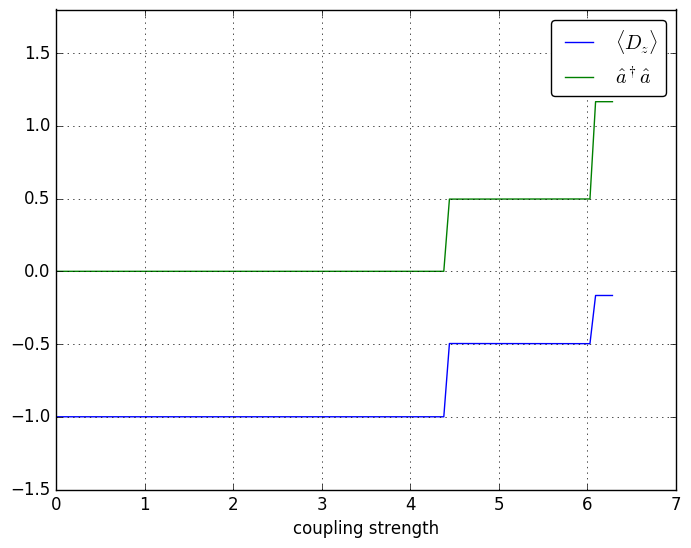

PyObject <matplotlib.legend.Legend object at 0x7f984adf1978>

In [26]:
g_state_sz_two = []
g_state_n_two = []
for i in 1:length(H_ground_2)
    push!(g_state_sz_two, expect(identityoperator(b_fock) ⊗ Dz, H_ground_2[i]))
    push!(g_state_n_two, expect(at*a ⊗ identityoperator(b_spin) ⊗ identityoperator(b_spin), H_ground_2[i]))
end


plot(g_coupling, g_state_sz_two, label = L"\langle D_z \rangle")
plot(g_coupling, g_state_n_two, label = L"\hat{a}^\dagger \hat{a}")


xlabel("coupling strength")
grid("on")
ylim(-1.5, 1.8)
legend(loc="upper right",fancybox="true")

## Para un átomo

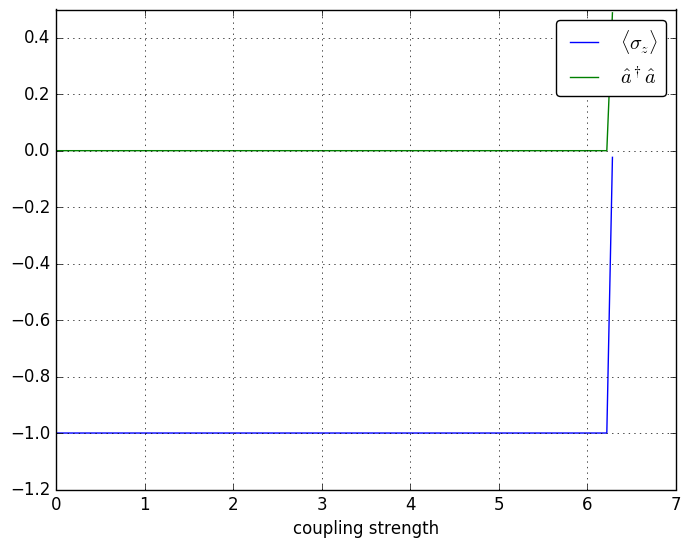

PyObject <matplotlib.legend.Legend object at 0x7f98475830f0>

In [27]:
Hint_coupling = [g*(at⊗sm + a⊗sp) for g in g_coupling]
H_coupling = [identityoperator(b_fock)⊗Hatom + Hfield⊗identityoperator(b_spin) + Hint for Hint in Hint_coupling]
H_ground = [groundstate(H_coupling[i]) for i in 1:length(H_coupling)]

g_state_sz = []
g_state_n = []

for i in 1:length(H_coupling)
    push!(g_state_sz, expect(identityoperator(b_fock) ⊗ sz, H_ground[i]))
    push!(g_state_n, expect(at*a ⊗ identityoperator(b_spin), H_ground[i]))
end
return (g_state_sz)
return real(g_state_n)

plot(g_coupling, real(g_state_sz), label = L"\langle \sigma_z \rangle")
plot(g_coupling, g_state_n, label = L"\hat{a}^\dagger \hat{a}")


xlabel("coupling strength")
grid("on")
ylim(-1.2, 0.5)
legend(loc="upper right",fancybox="true")

## Collapse Revival para g's distintas en un átomo

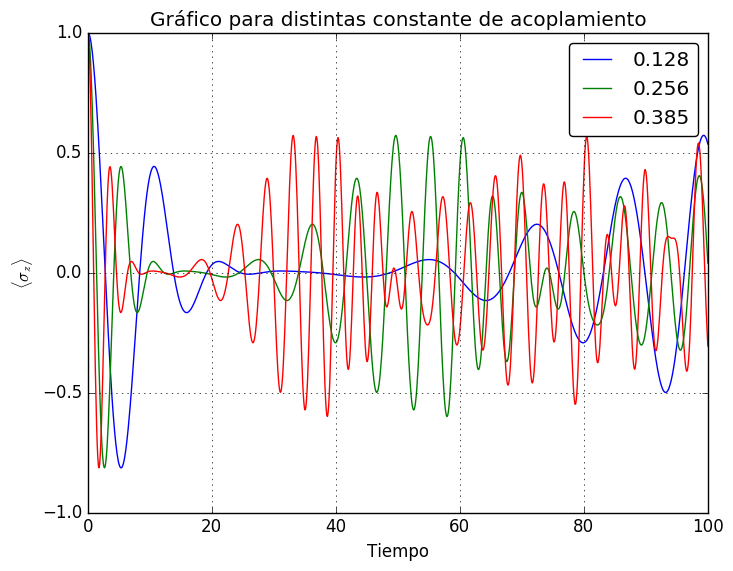

PyObject <matplotlib.text.Text object at 0x7f984756ceb8>

In [24]:
#g_coupling = [2*π*i for i in linspace(0,1,50)]  

Hint_coupling = [g*(at⊗sm + a⊗sp) for g in g_coupling]
H_coupling = [identityoperator(b_fock)⊗Hatom + Hfield⊗identityoperator(b_spin) + Hint for Hint in Hint_coupling] 

psi0 =(coherentstate(b_fock, 2) ⊗ (spinup(b_spin)))

psi_coupling_evol =  [timeevolution.schroedinger(T,psi0,H) for H in H_coupling]

expecto = []
for i in 1:length(H_coupling)
    tout, psi_coupling_evol = timeevolution.schroedinger(T,psi0,H_coupling[i])
    push!(expecto, expect(identityoperator(b_fock) ⊗ sz, psi_coupling_evol))
end
return expecto

for i in 2:4
    plot(T,expecto[i], label = round(g_coupling[i],3))
end

grid("on")
legend(loc="upper right",fancybox="true")
ylabel(L"\langle \sigma_z \rangle")
xlabel("Tiempo")
title("Gráfico para distintas constante de acoplamiento")

## Collapse Revival para g's distintas en dos átomo

In [29]:
g_coupling = [2*π*i for i in linspace(0,1,100)]  

Hint_coupling_two = [g* (a ⊗ sp_1 + at ⊗ sm_1) + g* (a ⊗ sp_2 + at ⊗ sm_2) for g in g_coupling]

H_coupling_two = [H_1 + H_2 + H_4 + H_field_atom for H_field_atom in Hint_coupling_two]

H_ground = [groundstate(H_coupling[i]) for i in 1:length(H_coupling)]

H_ground_2 = [groundstate(H_1 + H_2 + H_4 + g* (a ⊗ sp_1 + at ⊗ sm_1) + g* (a ⊗ sp_2 + at ⊗ sm_2)) for g in g_coupling]

100-element Array{QuantumOptics.states.Ket,1}:
 QuantumOptics.states.Ket(QuantumOptics.bases.CompositeBasis([16,2,2],QuantumOptics.bases.Basis[QuantumOptics.fock.FockBasis([16],0,15),QuantumOptics.spin.SpinBasis([2],1//2),QuantumOptics.spin.SpinBasis([2],1//2)]),Complex{Float64}[5.3685e-18-9.23155e-18im,2.33238e-16+1.43975e-16im,6.36418e-18+1.1759e-17im,0.971441+0.237283im,6.99729e-17-6.2003e-17im,2.62395e-17+5.59109e-17im,1.39517e-17+6.93658e-17im,-1.83709e-16+1.18405e-16im,4.90985e-18-1.34766e-17im,3.31955e-17+6.61884e-17im  …  6.98026e-18-2.07624e-17im,4.3476e-17-4.4317e-17im,1.23783e-18+9.28046e-18im,-7.66403e-18+3.24439e-17im,-2.36288e-17-2.27292e-18im,5.04473e-17-3.02964e-17im,1.70665e-16-8.20267e-17im,1.42127e-17+9.64575e-19im,-5.6453e-19+7.60391e-18im,1.19476e-17-2.87784e-17im])           
 QuantumOptics.states.Ket(QuantumOptics.bases.CompositeBasis([16,2,2],QuantumOptics.bases.Basis[QuantumOptics.fock.FockBasis([16],0,15),QuantumOptics.spin.SpinBasis([2],1//2),QuantumOptics.sp

In [31]:
ψ_inicial_up_up = coherentstate(b_fock, 2) ⊗ (spinup(b_spin)) ⊗ (spinup(b_spin))

psi_coupling_evol_up_up =  [timeevolution.schroedinger(tiempo,ψ_inicial_up_up,H) for H in H_coupling_two]

100-element Array{Tuple{Array{Float64,1},Array{QuantumOptics.states.Ket,1}},1}:
 ([0.0,0.1001,0.2002,0.3003,0.4004,0.500501,0.600601,0.700701,0.800801,0.900901  …  99.0991,99.1992,99.2993,99.3994,99.4995,99.5996,99.6997,99.7998,99.8999,100.0],QuantumOptics.states.Ket[QuantumOptics.states.Ket(QuantumOptics.bases.CompositeBasis([16,2,2],QuantumOptics.bases.Basis[QuantumOptics.fock.FockBasis([16],0,15),QuantumOptics.spin.SpinBasis([2],1//2),QuantumOptics.spin.SpinBasis([2],1//2)]),Complex{Float64}[0.135335+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.270671+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.382786+0.0im,0.0+0.0im  …  0.0+0.0im,0.0+0.0im,0.00750977+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.00387803+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im]),QuantumOptics.states.Ket(QuantumOptics.bases.CompositeBasis([16,2,2],QuantumOptics.bases.Basis[QuantumOptics.fock.FockBasis([16],0,15),QuantumOptics.spin.SpinBasis([2],1//2),QuantumOptics.spin.SpinBasis([2],1//2)]),Complex{Float64}[0.109039-0.0801637im,0.0+0.0im,0.

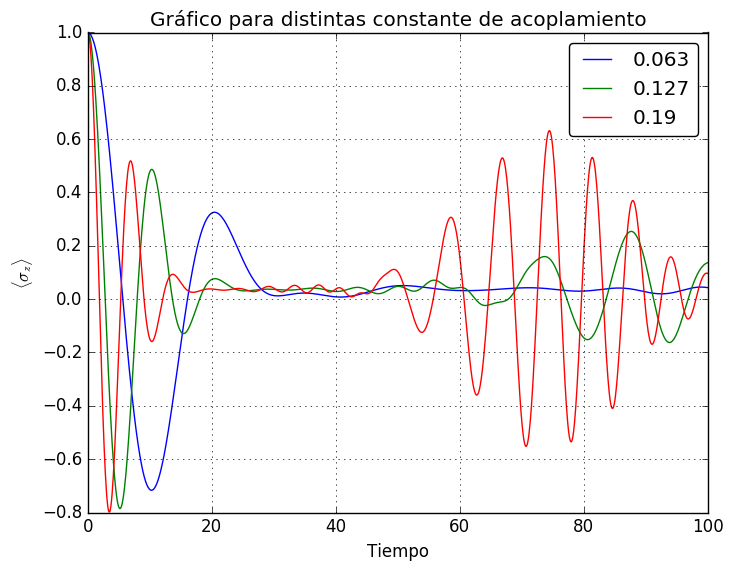

PyObject <matplotlib.text.Text object at 0x7f98470e0518>

In [38]:
expecto_two = []
for i in 1:length(H_coupling_two)
    tout, psi_coupling_evol_up_up = timeevolution.schroedinger(tiempo, ψ_inicial_up_up, H_coupling_two[i])
    push!(expecto_two, expect(identityoperator(b_fock) ⊗ Dz, psi_coupling_evol_up_up))
end
return expecto_two

for i in 2:4
    plot(tiempo,expecto_two[i], label = round(g_coupling[i],3))
    #plot(T,expecto[i], label = round(g_coupling[i],3))
end

grid("on")
legend(loc="upper right",fancybox="true")
ylabel(L"\langle \sigma_z \rangle")
xlabel("Tiempo")
title("Gráfico para distintas constante de acoplamiento")